In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

K = 3 #Number of classes
n = 3000 #Number of samples

# Questions préliminaires

Consider a symmetric graph $G$ with an adjacency matrix A whose elements are random and given by the expression: $A_{i,j} \hookrightarrow \mathcal{B}(q_iq_j\mathcal{C}_{ab})$, where $a$ is the class of $i$ and $b$ the class of $j$. We have $A \in \mathbb{R}^{n\times n}$ and $\mathcal{C} \in \mathbb{R}^{K \times K}$. $K$ is the number of classes.

$\mathcal{C}_{ab}$ is a parameter whose expression is: $\mathcal{C}_{ab} = 1 + \displaystyle\frac{M_{ab}}{\sqrt{n}}$.
and $B = A - q q^\top$. $q \in \mathbb{R}^n$ is the vector of $q_i$, where $q_i \in [0,1]$ represents a node of the graph.

$q_iq_j$ represents the coupling strength of the edge linking node $i$ and node $j$, and $C_{a,b}$ is the coupling strength between class $a$ and $b$.

We can express $A$ as $A = \mathbb{E}[A] + A - \mathbb{E}[A]$, where the expectation is conditional on $(q_i)_{i \in \{1, \dots, n\}}$. By construction, $A - \mathbb{E}[A]$ is of zero expectation, and has a variance profile...
It is therefore sufficient to show that $\mathbb{E}[A]$ has rank $k$.
By reasoning component by component, it immediately follows that $(\mathbb{E}[A])_{i,j} = \mathbb{E}[A_{i,j}] =q_iq_j\mathcal{C}_{ab}$. 

It can be rewritten as follows. Let $J = [J_1, \cdots, J_K]$ be the matrix of $\mathbb{R}^{n \times K}$, where the $i$-th column $J_i$ is the canonical vector of the $i$-th class, $Q = \text{diag}(q_1,\cdots, q_n) \in \mathbb{R}^{n \times n}$ and $(C_{i,j})_{i,j \in \{1, \cdots, K\}} = (\mathcal{C}_{ij})_{i,j \in \{1, \dots, K\}}$. 

We can then see that we can write $\mathbb{E}[A] = QJC(QJ)^\top$.
Now $C$ is a matrix of rank at most $K$, so we can deduce that $\mathbb{E}[A]$ is also of rank at most $K$. Next, the random matrix $A - \mathbb{E}[A]$ is indeed an independent entry with a variance profile, since $\mathbb{E}[(
A_{ij} - \mathbb{E}[A]_{ij})^2] = q_iq_j\mathcal{C}_{ab}(1 - q_iq_j\mathcal{C}_{ab})$.

The matrix $\frac{1}{\sqrt{n}}B$ is the matrix $\frac{1}{\sqrt{n}}A$ with the addition of a perturbation of rank 1. Note that $(\mathbb{E}[B])_{ij} = q_iq_j\displaystyle\frac{M_{ab}}{\sqrt{n}}$. In other words, we can again express $\mathbb{E}[B]$ as a product of well-chosen matrices. In this case, $\mathbb{E}[B] = QJM(QJ)^\top$, with of course $M = (\displaystyle\frac{M_{ab}}{\sqrt{n}})_{a,b \in \{1, \cdots, K\}} \in \mathbb{R}^{K \times K}$. In the same way, $B - \mathbb{E}[B] = A - \mathbb{E}[A]$ is also a random matrix with independent input, and with the same variance profile.

Consider in this example that $K = 3$ classes.

In [3]:
def q_case(i,q0,n):
    """
    Calculate q for three different cases : 
        - 'identical' : q is proportional to the unit vector
        - 'uniform' : q is spread uniformly around q0
        - 'two' : q can takes only two different values q^(1) and q^(2)
    """
    if i == "identical":
        return np.array([q0]*n)
    elif i == "uniform":
        return 0.1*np.random.rand(n) + 1/2
    elif i == "two":
        q = []
        for j in range(n):
            rand = np.random.binomial(1,1/2)
            if rand < 1/2:
                q += [q0[0]]
            else:
                q += [q0[1]]
        return q
    else:
        return 'error'

The parameter $M$ relates the interaction's strength from one class to another for off-diagonal terms, and to itself for on-diagonal terms. The inter-class' interactions are assumed small, noisy actually, while in-class' interactions are large.

In [4]:
M = np.array([[np.random.rand() for _ in range(K)] for _ in range(K)])
M[0,0] = 80
M[1,1] = 112
M[2,2] = 160

In what follows, we plot the eigenvalues of large random matrix in three different cases.

 * In the first case, $q$ is identical at every node of the graph.

 * In the second case, $q_i$ is uniform with mean $q_0$. That is, $q_i \sim \mathcal{U}[q_0 - 1/2, q_0 + 1/2]$.

 * In the third case, $q_i$ can only take two distincts value $q^{(1)}$ et $q^{(2)}$.

The vector's entries have been settled in order, i.e., the first third belongs to the first class, the second third to the second class and the last third to the last class.

Note that in term of amplitude, first comes **Class 3**, then **Class 2** and finally **Class 1**.

#### Case I: $\mathbf{q} = q_0\mathbf{1}$

In [5]:
np.random.seed(1000)
# q = q_case('identical', np.random.rand(),n)
q = [0.3 for _ in range(n)]
Class = np.random.randint(3, size = n)
Class = np.sort(Class)
Cab = 1 + M/np.sqrt(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i + 1):
        A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
        A[j,i] = A[i,j]

In [6]:
B = (A - np.outer(q,q))/np.sqrt(n)
Eigvalue1 ,eig_vec1 = np.linalg.eigh(B)

Number of eigenvalues out of the bulk :  3


Text(0.5, 1.0, 'Eigenvalues of B')

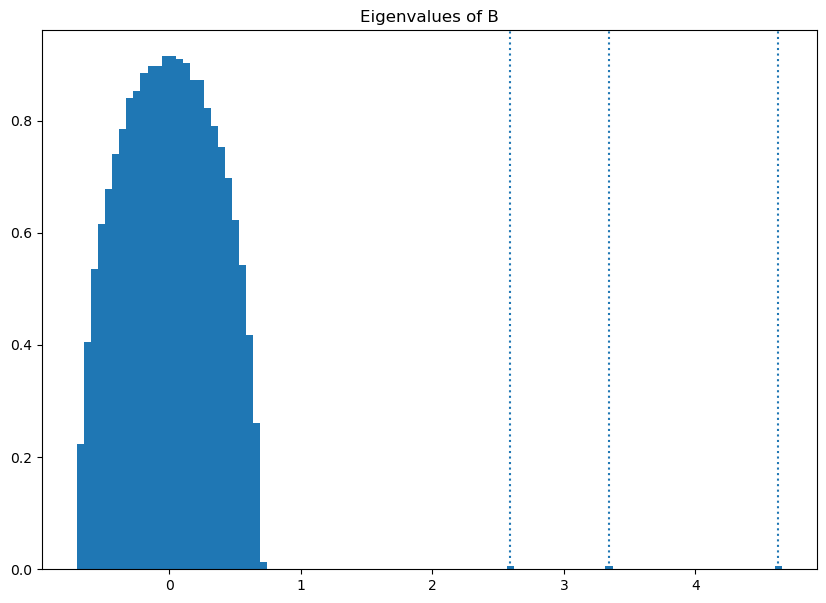

In [10]:
counts, bins = np.histogram(Eigvalue1, bins = 100)
loc = bins[np.where(counts == 1)] + (bins[1] - bins[0])/2

plt.figure(figsize = (10,7))
plt.hist(bins[:-1], bins, weights=counts,  density=True);
plt.axvline(loc[0], ls = 'dotted')
plt.axvline(loc[1], ls = 'dotted')
plt.axvline(loc[2], ls = 'dotted')
print('Number of eigenvalues out of the bulk : ', np.count_nonzero(counts[counts <= 1]))
plt.title("Eigenvalues of B")

Plot of the out-of-bulk eigenvectors.

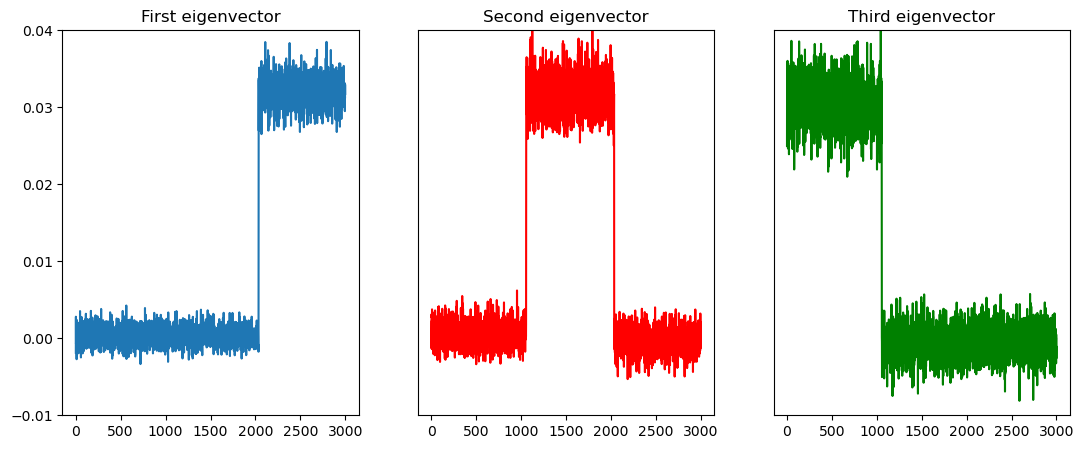

In [11]:
fig, ax = plt.subplots(1,3, figsize = (13,5))
ax[0].plot(eig_vec1[:,-1])
ax[0].title.set_text('First eigenvector')
ax[0].set_ylim([-0.01, 0.04])
ax[1].plot(eig_vec1[:,-2], color = 'red')
ax[1].set_yticks([])
ax[1].set_ylim([-0.01, 0.04])
ax[1].title.set_text('Second eigenvector')
ax[2].plot(eig_vec1[:,-3], color = 'green')
ax[2].set_yticks([])
ax[2].set_ylim([-0.01, 0.04])
ax[2].title.set_text('Third eigenvector')

Apply PCA to $B$ and project its columns entries along this axis.

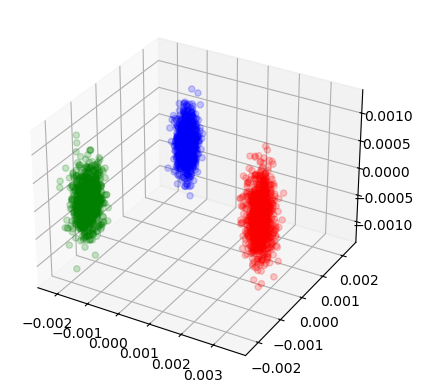

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d') #Add a 3D plot

kmeans = KMeans(n_clusters=3, n_init = 'auto')

pca = KernelPCA(n_components=3, kernel = 'rbf')
pc = pca.fit_transform(B)

km = kmeans.fit(pc)

color = ('blue', 'red', 'green')
colors = [color[i] for i in km.labels_]


ax.scatter(pc[:,0], pc[:,1], pc[:,2], color = colors, alpha = 0.2)
plt.show()

#### Case II: $q_i$ is uniform with mean $q_0$. That is, $q_i \sim \mathcal{U}[q_0 - 1/2, q_0 + 1/2]$.

In [14]:
Class = np.random.randint(3,size = n)
np.count_nonzero(Class == 2)

987

In [37]:
M = np.array([[np.random.rand() for _ in range(K)] for _ in range(K)])
M[0,0] = 80
M[1,1] = 90
M[2,2] = 100

In [40]:
# np.random.seed(10)
# q = q_case('identical', 0.2,n)
np.random.seed(1000)
q = q_case('uniform', 0.3,n)
print(q)
Class = np.random.randint(3, size = n)
Class = np.sort(Class)
Cab = 1 + M/np.sqrt(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        A[i,j] = np.random.binomial(1,np.clip(q[i]*q[j]*Cab[Class[i],Class[j]], None, 1))
        A[j,i] = A[i,j]

[0.56535896 0.51150069 0.59502829 ... 0.59887001 0.5525379  0.50555014]


In [41]:
B = (A - np.outer(q,q))/np.sqrt(n)
Eigvalue, eig_vec2 = np.linalg.eigh(B)

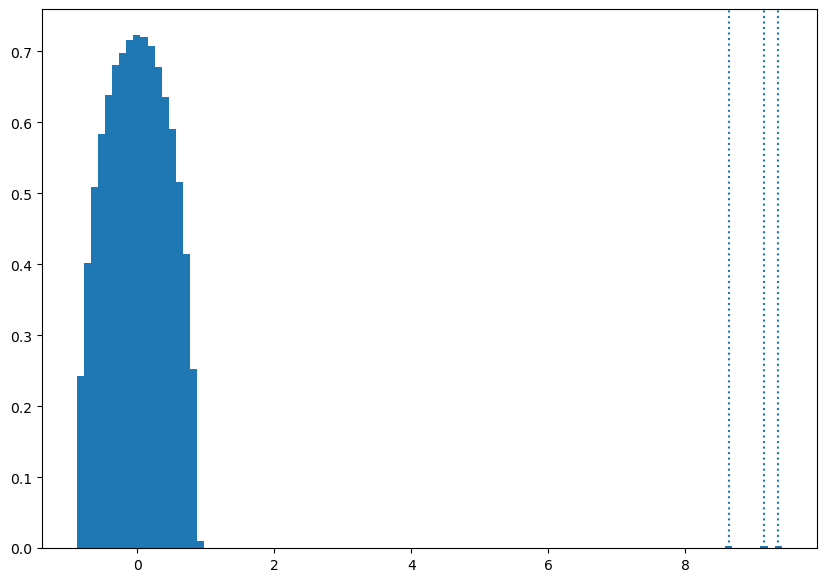

Number of eigenvalues out of the bulk :  3


In [45]:
counts,bins = np.histogram(Eigvalue, bins = 100);
loc = bins[np.where(counts == 1)] + (bins[1] - bins[0])/2
plt.figure(figsize = (10,7))
plt.hist(bins[:-1], bins, weights=counts, density = True);
plt.axvline(loc[0], ls = 'dotted')
plt.axvline(loc[1], ls = 'dotted')
plt.axvline(loc[2], ls = 'dotted')
plt.show()
print('Number of eigenvalues out of the bulk : ', np.count_nonzero(counts[counts < 3]))

Plot of the out-of-bulk eigenvectors.

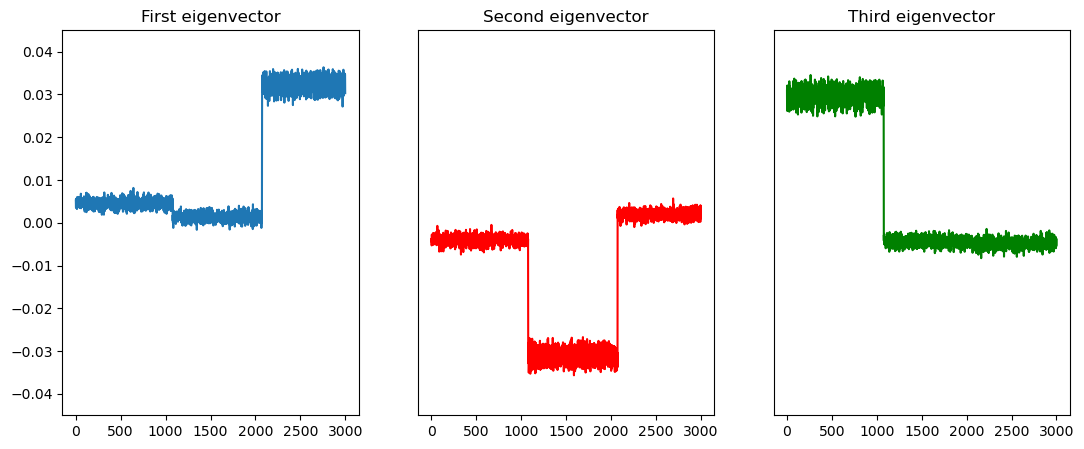

In [46]:
fig, ax = plt.subplots(1,3, figsize = (13,5))
ax[0].plot(eig_vec2[:,-1])
ax[0].title.set_text('First eigenvector')
ax[0].set_ylim([-0.045, 0.045])
ax[1].plot(eig_vec2[:,-2], color = 'red')
ax[1].set_yticks([])
ax[1].title.set_text('Second eigenvector')
ax[1].set_ylim([-0.045, 0.045])
ax[2].plot(eig_vec2[:,-3], color = 'green')
ax[2].set_yticks([])
ax[2].title.set_text('Third eigenvector')
ax[2].set_ylim([-0.045, 0.045])
plt.show()

Apply PCA to $B$ and project its columns entries along this axis.

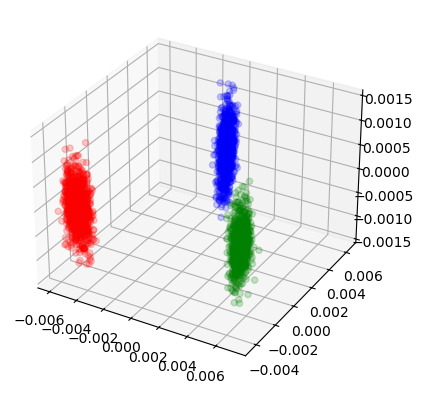

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d') #Add a 3D plot

kmeans = KMeans(n_clusters=3, n_init = 'auto')

pca = KernelPCA(n_components=3, kernel = 'rbf')
pc = pca.fit_transform(B)

km = kmeans.fit(pc)

color = ('blue', 'red', 'green')
colors = [color[i] for i in km.labels_]


ax.scatter(pc[:,0], pc[:,1], pc[:,2], color = colors, alpha = 0.2)
plt.show()

#### Case III: $q_i$ takes only two distincts values $q^{(1)}$ et $q^{(2)}$.

In [49]:
np.random.seed(100)
n = 3500

In [50]:
q = q_case('two', [0.1,0.5],n)
Class = np.random.randint(3, size = n)
Class = np.sort(Class)
M = np.diag([80,120,170]) + np.random.randn(3,3)
Cab = 1 + M/np.sqrt(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
        A[j,i] = A[i,j]

In [51]:
B = (A - np.outer(q,q))/np.sqrt(n)
Eigvalue, eig_vec3 = np.linalg.eigh(B)

Plot of the out-of-bulk eigenvectors.

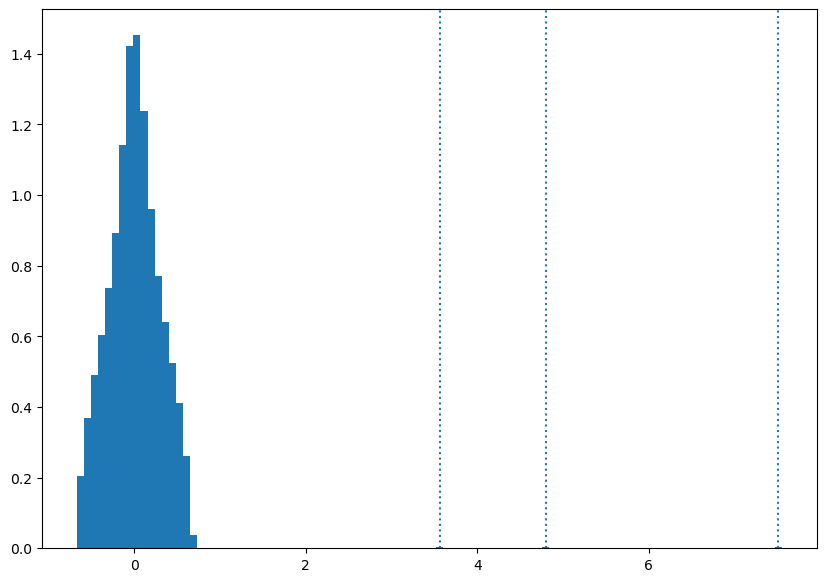

Number of eigenvalues out of the bulk :  3


In [53]:
counts,bins = np.histogram(Eigvalue, bins = 100)
loc = bins[np.where(counts == 1)] + (bins[1] - bins[0])/2
plt.figure(figsize = (10,7))
plt.hist(bins[:-1], bins, weights=counts, density = True);
plt.axvline(loc[0], ls = 'dotted')
plt.axvline(loc[1], ls = 'dotted')
plt.axvline(loc[2], ls = 'dotted')
plt.show()
print('Number of eigenvalues out of the bulk : ', np.count_nonzero(counts[counts < 3]))

(-0.07, 0.07)

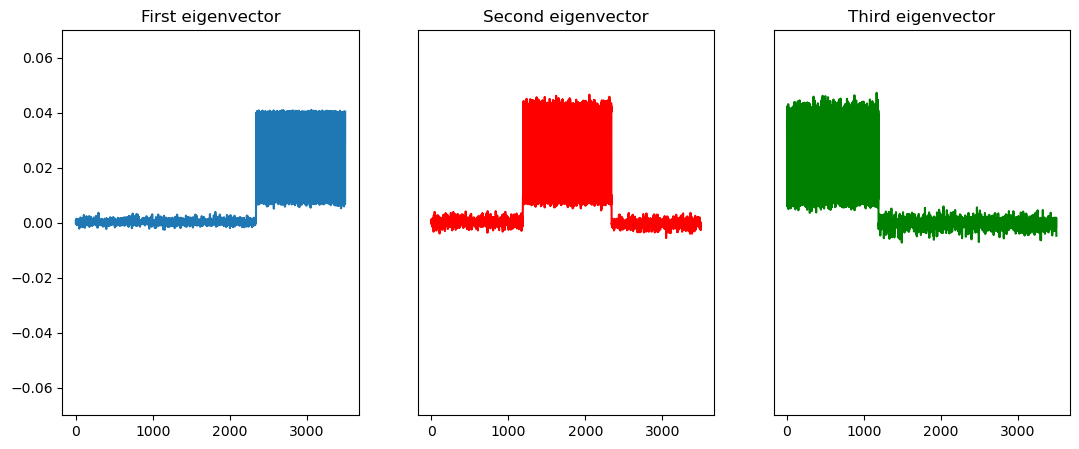

In [54]:
fig, ax = plt.subplots(1,3, figsize = (13,5))
ax[0].plot(eig_vec3[:,-1])
ax[0].title.set_text('First eigenvector')
ax[0].set_ylim([-0.07, 0.07])
ax[1].plot(eig_vec3[:,-2], color = 'red')
ax[1].set_yticks([])
ax[1].title.set_text('Second eigenvector')
ax[1].set_ylim([-0.07, 0.07])
ax[2].plot(eig_vec3[:,-3], color = 'green')
ax[2].set_yticks([])
ax[2].title.set_text('Third eigenvector')
ax[2].set_ylim([-0.07, 0.07])

Apply PCA to $B$ and project its columns entries along this axis.

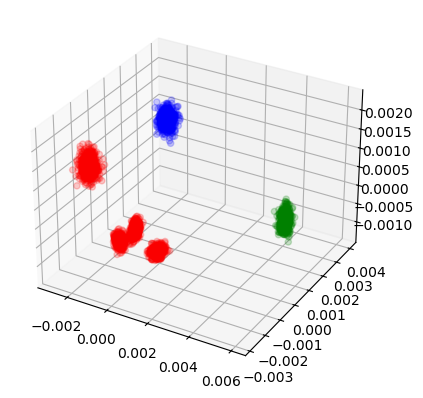

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d') #Add a 3D plot

kmeans = KMeans(n_clusters=3, n_init = 'auto')

pca = KernelPCA(n_components=3, kernel = 'rbf')
pc = pca.fit_transform(B)

km = kmeans.fit(pc)

color = ('blue', 'red', 'green')
colors = [color[i] for i in km.labels_]


ax.scatter(pc[:,0], pc[:,1], pc[:,2], color = colors, alpha = 0.2)

### Conclusion of the first part

In the three cases above, the first and third eigenvector are respectively associated to the largest and smallest eigenvalue in absolute value.
You can observe that the eigenvectors are kind of similar to class indicators of respectively the third, second and first Class. This is not in any random order, the largest eigenvalue naturally indicates the most self-interacting class, that is, Class 3 here. Similarly, the third eigenvector is an indicator of the least self-interacting class. Recall the amplitude of interactions are encoded in the matrix $M$.

If an eigenvalue is out, but yet close to the noisy bulk, the plateau might appear, but it will be much noisier, and consequently harder to detect. See an illustration below.

Number of eigenvalues out of the bulk :  3


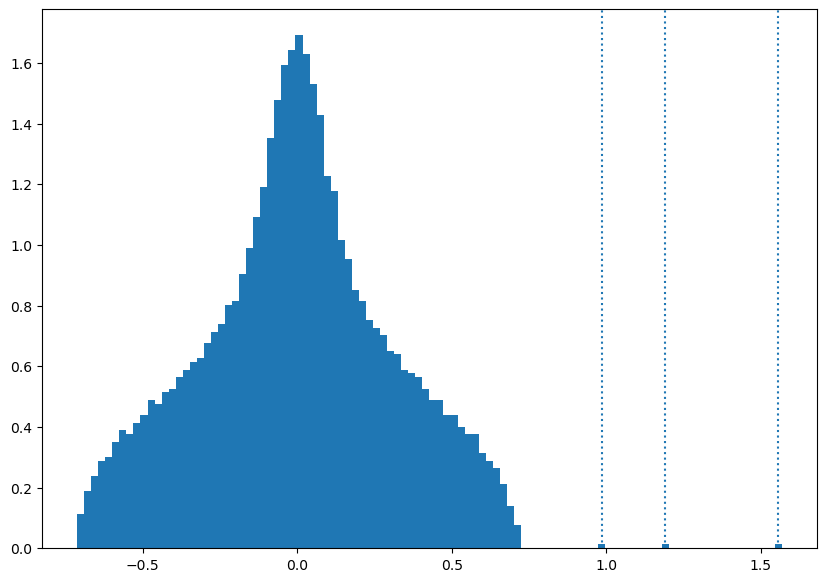

In [ ]:
q = q_case('two', [0.1,0.8],n)
Class = np.random.randint(3, size = n)
Class = np.sort(Class)
M = np.diag([13,10,8]) + np.random.randn(3,3)*0.01
Cab = 1 + M/np.sqrt(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
        A[j,i] = A[i,j]

B = (A - np.outer(q,q))/np.sqrt(n)
Eigvalue, eig_vec3 = np.linalg.eigh(B)

counts,bins = np.histogram(Eigvalue, bins = 100)
loc = bins[np.where(counts == 1)] + (bins[1] - bins[0])/2
plt.figure(figsize = (10,7))
plt.hist(bins[:-1], bins, weights=counts, density = True);
plt.axvline(loc[0], ls = 'dotted')
plt.axvline(loc[1], ls = 'dotted')
plt.axvline(loc[2], ls = 'dotted')
print('Number of eigenvalues out of the bulk : ', np.count_nonzero(counts[counts < 3]))

(-0.07, 0.07)

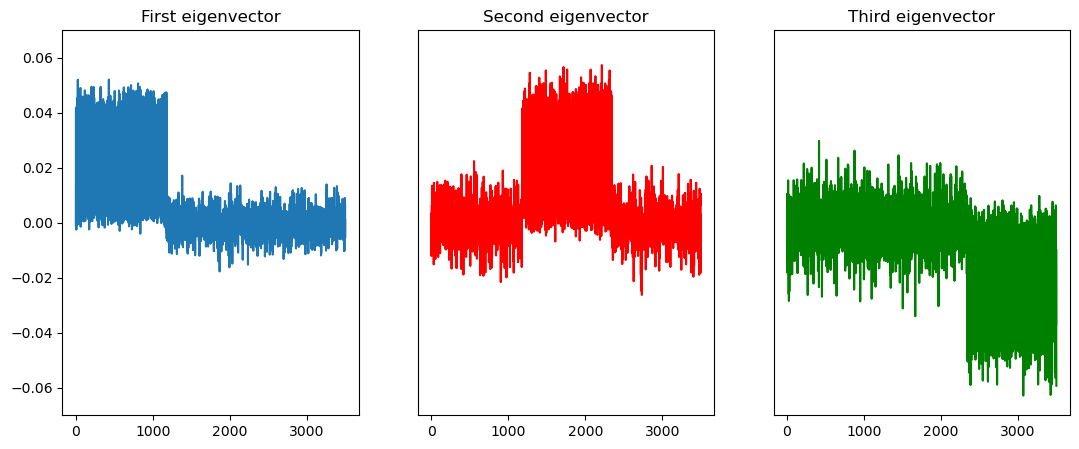

In [58]:
fig, ax = plt.subplots(1,3, figsize = (13,5))
ax[0].plot(eig_vec3[:,-1])
ax[0].title.set_text('First eigenvector')
ax[0].set_ylim([-0.07, 0.07])
ax[1].plot(eig_vec3[:,-2], color = 'red')
ax[1].set_yticks([])
ax[1].title.set_text('Second eigenvector')
ax[1].set_ylim([-0.07, 0.07])
ax[2].plot(eig_vec3[:,-3], color = 'green')
ax[2].set_yticks([])
ax[2].title.set_text('Third eigenvector')
ax[2].set_ylim([-0.07, 0.07])

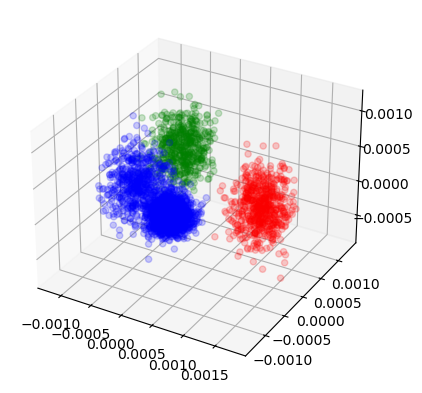

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d') #Add a 3D plot

kmeans = KMeans(n_clusters=3, n_init = 'auto')

pca = KernelPCA(n_components=3, kernel = 'rbf')
pc = pca.fit_transform(B)

km = kmeans.fit(pc)

color = ('blue', 'red', 'green')
colors = [color[i] for i in km.labels_]


ax.scatter(pc[:,0], pc[:,1], pc[:,2], color = colors, alpha = 0.2)
plt.show()

# Homogeneous case

Consider that $q_i = q_0$ for all $i \in \{1, \cdots, n\}$, and $M$ diagonal. A direct consequence is that $C$ also diagonal.

Q1) We wish to find conditions on $c_i$ and $M_{ii}$ to observe a ‘phase transition’, i.e. an abrupt and spontaneous change in the behaviour of the eigenvalues (in the almost-sure sense). To do this, it is customary to study the characteristic polynomial : $\det(\frac{1}{\sqrt{n}}B - \lambda \mathbf{I}_n)$. According to the preliminary questions, we decompose $B$ into two terms: a matrix of rank $K$, and another which will play the role of Wigner matrix (check that it respects all the hypotheses, it is indeed of zero expectation) i.e. $B = \underbrace{\mathbb{E}[B]}_{\text{rank K}} + \underbrace{(A - \mathbb{E}[A])}_{\text{Wigner matrix}}$. We then have 
$$
\det\left(\frac{1}{\sqrt{n}}B - \lambda \mathbf{I}_n\right) = \det\left(\frac{1}{\sqrt{n}}(\mathbb{E}[B] + (A - \mathbb{E}[A])) - \lambda \mathbf{I}_n\right) = \det\left(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n + \frac{1}{\sqrt{n}}\mathbb{E}[B]\right) 
$$
$$
= \det\left(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n\right) \det\left(\mathbf{I}_n + \frac{1}{\sqrt{n}}\mathbb{E}[B](\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n)^{-1}\right)
$$

And we recall that $\mathbb{E}[B] = QJM(QJ)^\top = q_0^2JMJ^\top$. We then apply Silvester's identity:
$$
\det\left(\frac{1}{\sqrt{n}}B - \lambda \mathbf{I}_n\right) = \det\left(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n\right) \det\left(\mathbf{I}_K + \frac{M}{\sqrt{n}}(QJ)^\top(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n)^{-1})QJ\right)
$$

We saw that the variance profile of the Wigner matrix was: $\mathbb{E}[\displaystyle\frac{1}{n}(
A_{ij} - \mathbb{E}[A]_{ij})^2] = \displaystyle\frac{1}{n}q_0^2\mathcal{C}_{ab}(1 - q_0^2\mathcal{C}_{ab}) \underset{ n \rightarrow \infty}{\sim}\displaystyle\frac{q_0^2(1 - q_0^2)}{n}$, because $\mathcal{C}_{ab} \underset{n \rightarrow \infty}{\sim} 1$. Thus, the asymptotics of the variance is $\frac{\sigma^2}{n}$ when $n$ tends towards $+\infty$, where of course $\sigma^2 = q_0^2(1 - q_0^2)$.

We see that the homogeneity assumption allows to decouple the classes from each other. This property is central to compute the determinant.

If $n$ is large enough, we can take $\lambda$ out of the semi-circle bulk, and then establish that almost-surely, $\det\left(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n\right) \neq 0$. Hence, if you search $\lambda$ such that $\det\left(\frac{1}{\sqrt{n}}B - \lambda \mathbf{I}_n\right) = 0$, it amounts to impose
$$
\det\left(\mathbf{I}_K + \frac{1}{\sqrt{n}}M(QJ)^\top(\frac{1}{\sqrt{n}}(A - \mathbb{E}[A]) - \lambda \mathbf{I}_n)^{-1})QJ\right) = 0.
$$

Isotrope Wigner theorem states that for any Wigner matrix, $\forall u, v \in \mathbb{R}^{n \times k}, u^\top(X_n - z I_n)^{-1}v - g_{sc}(z)u^\top v \overset{a.s}{\underset{n \rightarrow \infty}{\longrightarrow}} 0$. 
In our case, the variance of the matrix entries is not unitary, but is asymptotically $\sigma^2 = q_0^2(1 - q_0^2)$. Factorize this term, it yields :
$$
\det\left(\mathbf{I}_K + \frac{1}{\sigma\sqrt{n}}M(QJ)^\top(\frac{1}{\sqrt{n}\sigma}(A - \mathbb{E}[A]) - \frac{\lambda}{\sigma}\mathbf{I}_n)^{-1})QJ\right) = 0
$$

We then apply the isotrope Wigner theorem: $(QJ)^\top(\frac{1}{\sqrt{n}\sigma}(A - \mathbb{E}[A]) - \frac{\lambda}{\sigma}\mathbf{I}_n)^{-1})QJ - g_{sc}(\frac{\lambda}{\sigma})(QJ)^\top QJ \overset{a.s}{\underset{n \rightarrow +\infty}{\longrightarrow}} 0$.

It yields $(QJ)^\top QJ = q_0^2J^{\top}J = q_0^2 \text{diag}(|\mathcal{C}_1|, \cdots, |\mathcal{C}_K|) \underset{n \rightarrow +\infty}{\longrightarrow} q_0^2\text{diag}(c_1, \cdots, c_K)$.

Eventually, almost surely, $\displaystyle\prod\limits_{i = 1}^{K}\left(1 + \frac{m_iq_0^2}{\sigma}g_{sc}(\lambda/\sigma)\text{diag}(|\mathcal{C}_1|/n, \cdots, |\mathcal{C}_K|/n)\right) \overset{a.s}{\underset{n \rightarrow +\infty}{\longrightarrow}} 0$. 

When $m_i > 0$, we have shown that:
$$
\lambda_i = \frac{\sigma^2 + (m_ic_iq_0^2)^2}{m_ic_iq_0^2}
$$
We can then check that $\lambda_i \geq 2\sigma$ as soon as $m_ic_iq_0^2 > \sigma$. Let $x = m_ic_iq_0^2$, and let's quickly study the function $x \mapsto \frac{\sigma^2 + x^2}{x}$. It is derivable on $[2\sigma, +\infty]$, and is expressed by : $x \mapsto -\frac{\sigma^2}{x^2} + 1$. We can see that it is positive when $x \geq \sigma$, and cancels out at $\sigma$. We deduce that a local minimum is reached at $x = \sigma$, and that it is worth $2\sigma$. The behaviour of a phase change is thus well established. As soon as $m_ic_iq_0^2 > \sigma$, an eigenvalue emerges from the Wigner bulk on the right, at $2\sigma$. The same reasoning can be used for $m_i < 0$.

Homogeneous Wigner matrix with three classes.

In [430]:
np.random.seed(1000)
n = 3000
q = q_case('identical', np.random.rand(),n)
q = .6*np.ones(n)
sigma2 = q[0]**2*(1 - q[0]**2)
print('sigma2 is :', sigma2)
Class = np.random.randint(3,size = n)
M = np.diag([70,30,-10])
Cab = 1 + M/np.sqrt(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
        A[j,i] = A[i,j]

sigma2 is : 0.2304


Computation of $\displaystyle\frac{\sigma^2 + (m_ic_iq_0^2)^2}{m_ic_iq_0^2}$ for $i \in \{1, 2, 3\}$.

In [431]:
eig_asympt = np.array([((M[i,i]*q[0]**2*1/3)**2 + sigma2)/(M[i,i]*q[0]**2*1/3) for i in range(3)])[::-1]

Computation of the eigenvalues of $B$.

In [432]:
B = (A - np.outer(q,q))/np.sqrt(n)
Eigvalue,eigen_vector = np.linalg.eigh(B)

In [433]:
eig_1 = Eigvalue[0]
eig_2 = Eigvalue[-2]
eig_3 = Eigvalue[-1]
eig = np.array([eig_1, eig_2, eig_3])

print(np.abs((eig - eig_asympt)/eig))
print(eig)

[0.03851606 0.01628425 0.05212986]
[-1.34037407  3.60529055  8.89091045]


Plot the eigenvalues.

Number of eigenvalues out of the bulk :  4
-1.2892176453948934 3.6217989234699126 8.83975402788877


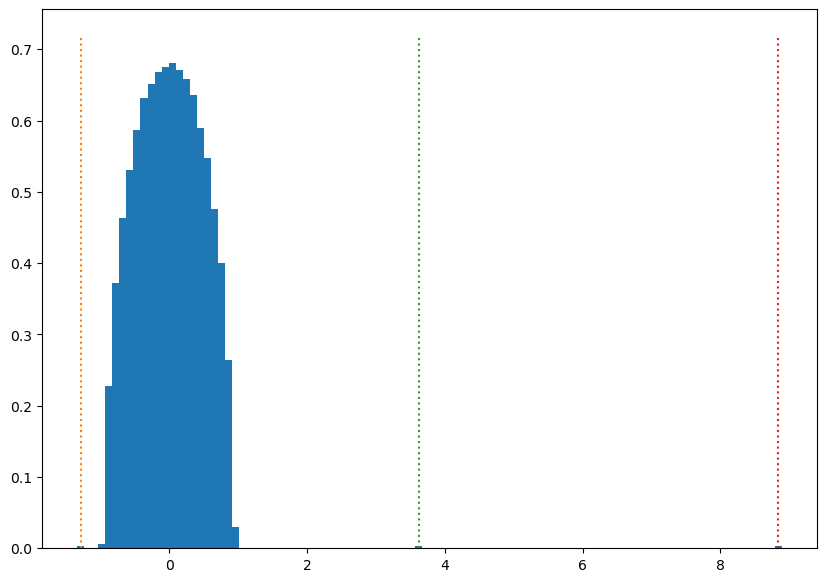

In [ ]:
counts,bins = np.histogram(Eigvalue, bins = 100);
loc = bins[np.where(counts == 1)] + (bins[1] - bins[0])/2
plt.figure(figsize = (10,7))
plt.hist(bins[:-1], bins, weights=counts, density = True);
plt.axvline(loc[0], ls = 'dotted')
plt.axvline(loc[1], ls = 'dotted')
plt.axvline(loc[2], ls = 'dotted')
print('Number of eigenvalues out of the bulk : ', np.count_nonzero(counts[counts < 3]))
print(loc[0], loc[1], loc[2])

In [ ]:
def convergence(N):
    error_1 = []
    error_2 = []
    error_3 = []

    err_1 = 0
    err_2 = 0
    err_3 = 0

    np.random.seed(1000)
    q0 = np.random.rand()
    for n in N:
        np.random.seed(1000)
        q = q_case('identical', q0, n)
        Class = np.random.randint(3,size = n)
        M = np.diag([10,5,-10])
        Cab = 1 + M/np.sqrt(n)
        A = np.zeros((n,n))
        for _ in range(10):
            for i in range(n):
                for j in range(i+1):
                    A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
                    A[j,i] = A[i,j]
            
            eig_asympt = np.array([((M[i,i]*q[0]**2*1/3)**2 + sigma2)/(M[i,i]*q[0]**2*1/3) for i in range(3)])[::-1]

            B = (A - np.outer(q,q))/np.sqrt(n)
            Eigvalue,eigen_vector = np.linalg.eigh(B)

            eig_1 = Eigvalue[0]
            eig_2 = Eigvalue[-2]
            eig_3 = Eigvalue[-1]
            eig = np.array([eig_1, eig_2, eig_3])

            err_1 += np.abs(eig_1 - eig_asympt[0])
            err_2 += np.abs(eig_2 - eig_asympt[1])
            err_3 += np.abs(eig_3 - eig_asympt[2])

        error_1 += [err_1/10]
        error_2 += [err_2/10]
        error_3 += [err_3/10]

        err_1 = 0
        err_2 = 0
        err_3 = 0

    return error_1, error_2, error_3

N = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 6500]
error_1, error_2, error_3 = convergence(N)

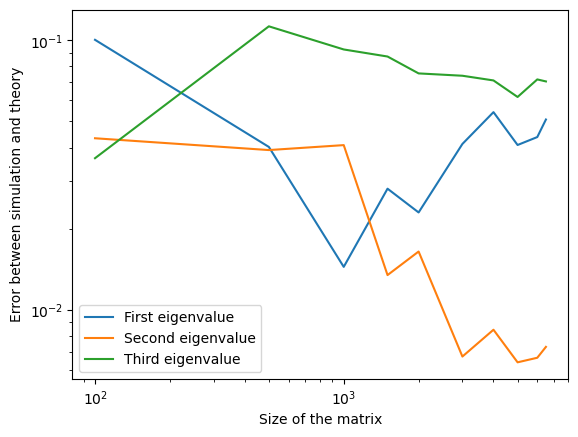

In [15]:
plt.loglog(N,error_1, label='First eigenvalue')
plt.loglog(N,error_2, label='Second eigenvalue')
plt.loglog(N,error_3, label='Third eigenvalue')
plt.xlabel("Size of the matrix")
plt.ylabel("Error between simulation and theory")
plt.legend()

(0.0, 2.0)

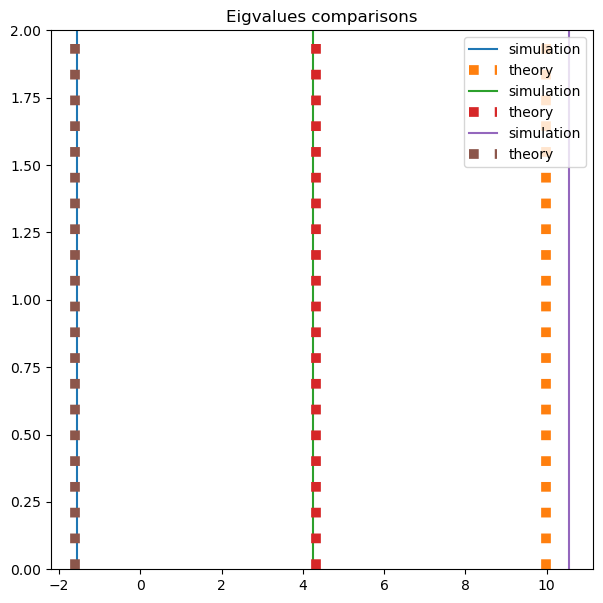

In [ ]:
plt.figure(figsize=(7,7))
plt.plot([eig_1 for _ in range(10)], np.arange(10), label = 'simulation')
plt.axvline(((M[0,0]*q[0]**2*1/3)**2 + sigma2)/(M[0,0]*q[0]**2*1/3), 10, linestyle = 'dotted', label = 'theory', linewidth = 7)
plt.axvline(eig_2, 10, label = 'simulation')
plt.axvline(((M[1,1]*q[0]**2*1/3)**2 + sigma2)/(M[1,1]*q[0]**2*1/3), 10, linestyle = 'dotted', label = 'theory', linewidth = 7)
plt.axvline(eig_3, 10, label = 'simulation')
plt.axvline((M[2,2]*q[0]**2*1/3)**2 + sigma2)/(M[2,2]*q[0]**2*1/3), 10, linestyle = 'dotted', label = 'theory', linewidth = 7)
plt.title('Eigvalues comparisons')
plt.legend()
plt.ylim(0,2)

We can show that, when $n_a \longrightarrow +\infty$:
$$
\frac{1}{n_a}j_a^\top u_a u_a^\top j_a \longrightarrow 1 - \frac{\sigma^2}{(q_0^2M_ac_a)^2},
$$
where $u_a$ is the eigenvector associated wit the class $a$.

Let's rewrite $\bar{A} = \frac{A-\mathbb{E}[A]}{\sqrt{n}} $ and remember that $\mathbb{E}[B] = \frac{1}{\sqrt{n}}QJM(QJ)^\top$ :
$$
    Q_{\frac{B}{\sqrt{n}}}(z) = \left( \frac{B}{\sqrt{n}} - z I_n \right)^{-1} = 
        \left( \frac{\mathbb{E}[B]}{\sqrt{n}} + \frac{A-\mathbb{E}[A]}{\sqrt{n}} - z I_n \right)^{-1} = 
        \left( \frac{1}{n}QJM(QJ)^\top + Q_{\bar{A}}(z)^{-1} \right)^{-1}
$$
Woodbury's formula is then applied:
$$
Q_{\frac{B}{\sqrt{n}}}(z) = Q_{\bar{A}}(z) - Q_{\bar{A}}(z) \frac{1}{n} QJ \left( M^{-1} + \frac{1}{n} (QJ)^\top Q_{\bar{A}}(z) QJ \right)^{-1} (QJ)^\top Q_{\bar{A}}(z)
$$
We now apply the isotropic Wigner theorem:

* $Q_{\bar{A}}(z) -\frac{1}{\sigma} g_{sc}(\frac{z}{\sigma}) I_n \underset{n \to +\infty}{\overset{a.s.}{\longrightarrow}} 0$
* $\frac{1}{n}(QJ)^\top Q_{\bar{A}}(z) QJ - g_{sc}(\frac{z}{\sigma}) \frac{q_0^2}{\sigma} \text{diag}\bigg( c_1, \cdots, c_K \bigg) \overset{a.s}{\underset{n \rightarrow +\infty}{\longrightarrow}} 0$

So, as $M = \text{diag}\big(M_1, \dots, M_K\big)$ :
$$ \left( M^{-1} + \frac{1}{n} (QJ)^\top Q_{\bar{A}}(z) QJ \right)^{-1} \overset{a.s}{\underset{n \rightarrow +\infty}{\longrightarrow}} \text{diag}\bigg(\frac{\sigma M_1}{q_0^2 c_1 M_1 g_{sc}(\frac{z}{\sigma}) + \sigma }, \dots , \frac{\sigma M_K}{q_0^2 c_K M_K g_{<sc}(\frac{z}{\sigma}) + \sigma }\bigg)
$$
We therefore obtain the following asymptotic expansion: 
$$ \frac{1}{n} QJ \left( M^{-1} + \frac{1}{n} (QJ)^\top Q_{\bar{A}}(z) QJ \right)^{-1} (QJ)^\top \overset{a.s}{\underset{n \rightarrow +\infty}{\sim}} \frac{1}{n} J \text{diag} (\frac{q_0^2 \sigma M_1}{q_0^2 c_1 M_1 g_{sc}(\frac{z}{\sigma}) + \sigma }, \dots , \frac{q_0^2 \sigma M_K}{q_0^2 c_K M_K g_{sc}(\frac{z}{\sigma}) + \sigma }) J^\top +o(1)
$$

and almost-surely :
$$ Q_{\frac{B}{\sqrt{n}}}(z) - \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma}) I_n - \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma})^2 \frac{1}{n} J \text{diag} \big(\frac{q_0^2  M_1}{q_0^2 c_1 M_1 g_{sc}(\frac{z}{\sigma}) + \sigma }, \dots , \frac{q_0^2  M_K}{q_0^2 c_K M_K g_{sc}(\frac{z}{\sigma}) + \sigma }\big) J^\top \overset{a.s}{\underset{n \rightarrow +\infty}{\longrightarrow}} 0
$$

Let's now decompose the matrix $\frac{B}{\sqrt{n}}$. Let us denote $(\lambda_i, \hat{u}_i )$ its spectral decomposition.
Then :
$$ Q_{\frac{B}{\sqrt{n}}}(z) = \sum\limits_{i=1}^n \frac{\hat{u}_i \hat{u}_i^\top}{\lambda_i - z}$$
Now let $\lambda_m$ be an isolated eigenvalue which will tend asymptotically to $\tilde{\lambda}_m$, the eigenvector associated with the class $m$. Let $\hat{u}_m$ be its associated eigenvector. Consider $\Gamma_m$ a positively oriented contour which surrounds the eigenvalue $\lambda_m$ but none of the other eigenvalues.

Let $j_a$ be the canonical vector of the class $C_a$, and $n_a$ the number of individuals .

Then by complex integration we have :
$$
    \frac{1}{2i\pi} \oint_{\Gamma_m} \frac{1}{n_a} j_a^\top Q_{\frac{B}{\sqrt{n}}}(z) j_a dz 
        = \frac{1}{2i\pi} \sum\limits_{i=1}^n \frac{1}{n_a} j_a^\top \hat{u}_i \hat{u}_i^\top j_a \oint_{\Gamma_m} \frac{1}{\lambda_i - z}  dz
        = - \frac{1}{n_a} j_a^\top \hat{u}_m \hat{u}_m^\top j_a
$$
The $n_a$ term here is a normalisation factor, since $j_a^\top j_a = n_a$.
Our previous calculations also give us a limited expansion of this integral:

\begin{align*}
    \frac{1}{2i\pi} \oint_{\Gamma_m} \frac{1}{n_a} j_a^\top Q_{\frac{B}{\sqrt{n}}}(z) j_a dz =&
         \frac{1}{2i\pi} \oint_{\Gamma_m} \frac{1}{n_a} j_a^\top \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma}) I_n j_a dz \\
          & - \frac{1}{2i\pi} \oint_{\Gamma_m} \frac{1}{n_a n \sigma} g_{sc}(\frac{z}{\sigma})^2 j_a^\top J \text{diag} (\frac{q_0^2 c_1 M_1}{q_0^2 c_1 M_1 g_{sc}(\frac{z}{\sigma}) + \sigma }, \dots , \frac{q_0^2 c_K M_K}{q_0^2 c_K M_K g_{sc}(\frac{z}{\sigma}) + \sigma }) J^\top j_a dz \\
          & + o(1)
\end{align*}
Note that the first integral is zero, because the function $g_{sc}$ is holomorphic inside the $\Gamma_m$ contour.
In the second integral, only the term in $\frac{q_0^2 c_a M_a}{q_0^2 c_a M_a g_{sc}(\frac{z}{sigma}) + \sigma }$ will be of interest to us, because like the previous integral, all the other terms will be holomorphic inside the $\Gamma_m$ contour. Moreover, we must have ‘$m = a$’, because otherwise, the projection onto $j_a^\top J$ would give $0$.
This leaves us with $\frac{1}{n_a} j_a^\top j_a = 1$ :
$$
\frac{1}{n_a} j_a^\top \hat{u}_m \hat{u}_m^\top j_a = \frac{1}{2i\pi} \oint_{\Gamma_m}  \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma})^2 \frac{q_0^2 c_a M_a}{q_0^2 c_a M_a g_{sc}(\frac{z}{\sigma}) + \sigma }  dz  + o(1) $$

Here we have a pole, because we calculated in the previous question that :
$$ g_{sc}(\frac{\lambda_m}{\sigma}) = -\frac{\sigma}{q_0^2 M_a c_a} $$

We will therefore apply the residue theorem:
\begin{align*}
     \frac{1}{2i\pi} \oint_{\Gamma_m}  \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma})^2 \frac{q_0^2 c_a M_a}{q_0^2 c_a M_a g_{sc}(\frac{z}{\sigma}) + \sigma }  dz 
        &= \lim\limits_{z \to \lambda_m} (z-\lambda_m) \frac{1}{\sigma} g_{sc}(\frac{z}{\sigma})^2 \frac{q_0^2 c_a M_a}{q_0^2 c_a M_a g_{sc}(\frac{z}{\sigma}) + \sigma }\\
        &= g_{sc}(\frac{\lambda_m}{\sigma})^2 \lim\limits_{z \to \lambda_m}  (\frac{z-\lambda_m}{\sigma})  \frac{1}{ g_{sc}(\frac{z}{\sigma}) - g_{sc}(\frac{\lambda_m}{\sigma}) } \\
        &= g_{sc}(\frac{\lambda_m}{\sigma})^2 \frac{1}{g_{sc}'(\frac{\lambda_m}{\sigma})}\\
        &= 1 - g_{sc}(\frac{\lambda_m}{\sigma})^2\\
        &= 1 - \frac{\sigma^2}{(q_0^2 c_a M_a)^2}
\end{align*}

This gives us the following expansion:
$$ \frac{1}{n_a} j_a^\top \hat{u}_m \hat{u}_m^\top j_a = 1 - \frac{\sigma^2}{(q_0^2 c_a M_a)^2} + o(1) $$

We can see that when $M_a$ tends towards infinity, then the alignment tends towards 1, which is reassuring because spectral clustering then becomes simpler to implement using canonical class vectors. This makes it easier to interpret the eigenvectors as class indicator vectors, which is ideal for classification.

Note: $c_a = \frac{1}{3}$ for all classes.


In [409]:
j1 = np.zeros(n)
j2 = np.zeros(n)
j3 = np.zeros(n)
j1[np.where(Class == 0)] = 1
j2[np.where(Class == 1)] = 1
j3[np.where(Class == 2)] = 1
print("There is {} elements in class 1, {} elements in class 2, and {} elements in class 3, for a total of {} elements".format(int(np.sum(j1)), int(np.sum(j2)), int(np.sum(j3)), n))

There is 1055 elements in class 1, 980 elements in class 2, and 965 elements in class 3, for a total of 3000 elements


In [410]:
out_of_bulk_vec1 = eigen_vector[:,-1]
out_of_bulk_vec2 = eigen_vector[:,-2]
out_of_bulk_vec3 = eigen_vector[:,0]

In [411]:
print(1 - sigma2/(q[0]**2*1/3*np.diag(M)[0])**2)
print(np.dot(j1,out_of_bulk_vec1)**2/np.dot(j1,j1))
print("The relative error is:", np.abs(((1 - sigma2/(q[0]**2*1/3*np.diag(M)[0])**2 - np.dot(j1,out_of_bulk_vec1)**2/np.dot(j1,j1))/np.dot(j1,out_of_bulk_vec1)**2/np.dot(j1,j1))))

0.996734693877551
0.9974208422358737
The relative error is: 6.180657391229806e-10


In [412]:
print(1 - sigma2/(q[0]**2*1/3*np.diag(M)[1])**2)
np.dot(j2,out_of_bulk_vec2)**2/np.dot(j2,j2)
print("The relative error is:", np.abs(((1 - sigma2/(q[0]**2*1/3*np.diag(M)[1])**2 - np.dot(j2,out_of_bulk_vec2)**2/np.dot(j2,j2))/np.dot(j2,out_of_bulk_vec2)**2/np.dot(j2,j2))))

0.9822222222222222
The relative error is: 1.0033158765408922e-09


In [413]:
print(1 - sigma2/(q[0]**2*1/3*np.diag(M)[2])**2)
print(np.dot(j3,out_of_bulk_vec3)**2/np.dot(j3,j3))
print("The relative error is:", np.abs(((1 - sigma2/(q[0]**2*1/3*np.diag(M)[2])**2 - np.dot(j3,out_of_bulk_vec3)**2/np.dot(j3,j3)
)/np.dot(j3,out_of_bulk_vec3)**2/np.dot(j3,j3))))

0.84
0.8380712202443741
The relative error is: 2.471423007215127e-09


We observe the right asymptotic behaviour. Let's give a quick look at the convergence rate.

In [ ]:
def convergence(N):
    error_1 = []
    error_2 = []
    error_3 = []

    err_1 = 0
    err_2 = 0
    err_3 = 0

    np.random.seed(1000)
    q0 = .6
    M = np.diag([-10,30,70])
    for n in N:
        Class = np.random.randint(3,size = n)
        Cab = 1 + M/np.sqrt(n)
        A = np.zeros((n,n))
        q = q0*np.ones(n)
        for _ in range(5):
            for i in range(n):
                for j in range(i+1):
                    A[i,j] = np.random.binomial(1,q[i]*q[j]*Cab[Class[i],Class[j]])
                    A[j,i] = A[i,j]

            B = (A - np.outer(q,q))/np.sqrt(n)
            Eigvalue,eigen_vector = np.linalg.eigh(B)

            eig_1 = eigen_vector[:, 0]
            eig_2 = eigen_vector[:, -2]
            eig_3 = eigen_vector[:, -1]

            j1 = np.zeros(n)
            j2 = np.zeros(n)
            j3 = np.zeros(n)

            j1[np.where(Class == 0)] = 1
            j2[np.where(Class == 1)] = 1
            j3[np.where(Class == 2)] = 1

            err_1 += np.abs((1 - sigma2/(q[0]**2*1/3*np.diag(M)[0])**2 - np.dot(j1,eig_1)**2/np.dot(j1,j1)))
            err_2 += np.abs((1 - sigma2/(q[0]**2*1/3*np.diag(M)[1])**2 - np.dot(j2,eig_2)**2/np.dot(j2,j2)))
            err_3 += np.abs((1 - sigma2/(q[0]**2*1/3*np.diag(M)[2])**2 - np.dot(j3,eig_3)**2/np.dot(j3,j3)))

        error_1 += [err_1/5]
        error_2 += [err_2/5]
        error_3 += [err_3/5]

        err_1 = 0
        err_2 = 0
        err_3 = 0

    return error_1, error_2, error_3

N = [2200, 3000, 4000, 5000, 6000, 6500]
error_1, error_2, error_3 = convergence(N)

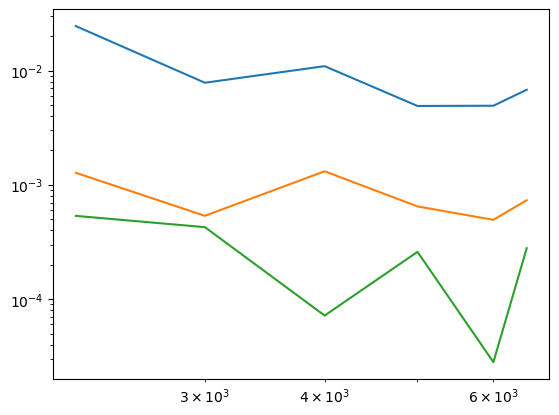

In [ ]:
plt.loglog(N,error_1)
plt.loglog(N,error_2)
plt.loglog(N,error_3)